In [9]:
import dlib
import cv2

def rect_to_bb(rect): # 获得人脸矩形的坐标信息
    enlarge = 0.3
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    x = int(x - enlarge * w)
    y = int(y - enlarge * w)
    w = int((2 * enlarge + 1) * w)
    h = int((2 * enlarge + 1) * h)
    return (x, y, w, h)


def resize(image, width=299):  
    r = width * 1.0 / image.shape[1]
    dim = (width, int(image.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def crop(image_file):
    image = cv2.imread(image_file)
    
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    detector = dlib.get_frontal_face_detector()
    rects = detector(gray, 1)
    for (i, rect) in enumerate(rects): #只有一张脸？
        (x, y, w, h) = rect_to_bb(rect)
        crop_img = resize(image[y:y+h, x:x+w])
        return crop_img

    
        

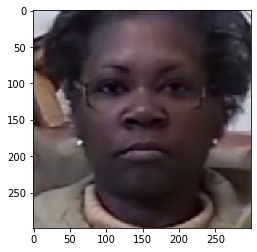

In [11]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.show()